## Chapter7 연속형 확률변수

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [2]:
from scipy import integrate
import warnings

# 적분에 관한 warning을 출력하지 않도록 한다
warnings.filterwarnings('ignore',
                        category=integrate.IntegrationWarning)

## 7.2   2차원 연속형 확률변수

#### 결합확률밀도함수
- 2차원 연속형 확률변수(X,Y)는 확률변수가 취할 수 있는 값의 조합 {(x,y)|a<=x<=b, c<=y<=d}와 이것을 정의역으로 하는 함수 f(x,y)에 의해 정의됩니다. 
- 이 함수 f(x,y)를 결합확률밀도함수라 함. 
- x0<=X<=x1 및 y0<=Y<=y1이 되는 확률은 다음과 같이 정의함. 
$\\$
$P(x_0 \le X \le x_1,y_0 \le Y \le y_1) = \int_{y_0}^{y_1}\int_{x_0}^{x_1}f(x,y)dxdy $


#### 확률의 성질: 1) 확률은 0이상이다. 2) 확률의 합은 1이다.

In [3]:
x_range = [0, 2]
y_range = [0, 1]

In [4]:
def f_xy(x, y):
    if 0 <= y <= 1 and 0 <= x - y <= 1:
        return 4 * y * (x - y)
    else:
        return 0

In [5]:
XY = [x_range, y_range, f_xy]

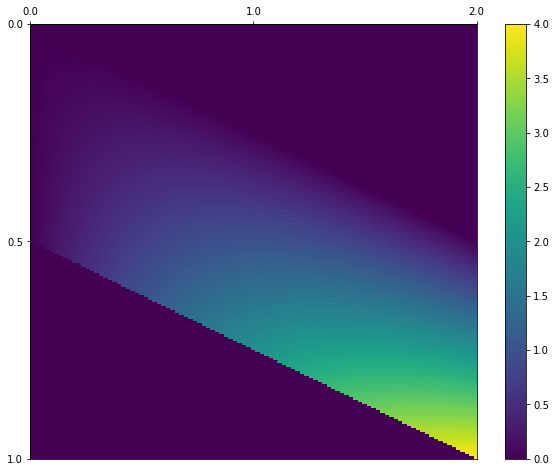

In [6]:
xs = np.linspace(x_range[0], x_range[1], 200)
ys = np.linspace(y_range[0], y_range[1], 200)
pd = np.array([[f_xy(x, y) for y in ys] for x in xs])
# print(pd)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(pd)
ax.set_xticks(np.linspace(0, 200, 3), minor=False)
ax.set_yticks(np.linspace(0, 200, 3), minor=False)
ax.set_xticklabels(np.linspace(0, 2, 3))
ax.set_yticklabels(np.linspace(0, 1, 3))
ax.invert_yaxis()
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [7]:
# 첫 번째 인수는 피적분함수、두 번째 인수는 x의 적분구간과 y의 적분구간
# 적분결과가 1이 넘는데 잘 못된 것인지 확인!
integrate.nquad(f_xy,
                [[-np.inf, np.inf],
                 [-np.inf, np.inf]])[0]

1.326

#### 주변확률밀도함수
- 확률변수X만의 움직임, 즉 확률변수X의 밀도함수를 알고 싶다
- 확률변수X의 밀도함수를 $f_{X}(x)$라고 하면, 
$\\$
$f_{X}(x)=\int_{-\infty}^{\infty}f(x,y)dy$



- $f_{X}(x)$를 X의 주변확률밀도함수라 하고, 간단히 "주변밀도함수"라고도 합니다.

In [8]:
from functools import partial
def f_X(x):
    # f_xy중에 x가 고정되고, 인수가 y만으로 된 함수가 반환됨. 
    return integrate.quad(partial(f_xy, x), -np.inf, np.inf)[0]
def f_Y(y):
    return integrate.quad(partial(f_xy, y=y), -np.inf, np.inf)[0]

In [9]:
X = [x_range, f_X]
Y = [y_range, f_Y]

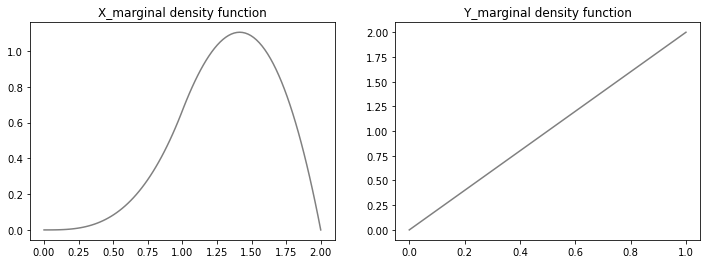

In [10]:
xs = np.linspace(*x_range, 100)
ys = np.linspace(*y_range, 100)

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(xs, [f_X(x) for x in xs], color='gray')
ax2.plot(ys, [f_Y(y) for y in ys], color='gray')
ax1.set_title('X_marginal density function')
ax2.set_title('Y_marginal density function')

plt.show()

#### 기댓값
$\mu_{X}=E(X)=\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}xf(x,y)dxdy$

In [11]:
def integrand(x,y):
    return x*f_xy(x,y)
integrate.nquad(integrand,[[-np.inf,np.inf],[-np.inf,np.inf]])[0]

0.863

$E(g(X,Y))=\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}g(x,y)f(x,y)dxdy$
- g(x,y)=x 라고 X에 대한 기대값 "E(X)"을 구할 수 있음 
##### 체크 #####

In [12]:
def E(XY,g):
    x_range, y_range, f_xy = XY
    def integrand(x,y):
        return g(x,y)*f_xy(x,y)
    return integrate.nquad(integrand,[[-np.inf,np.inf],[-np.inf,np.inf]])[0]

In [13]:
mean_X = E(XY, lambda x,y:x)
mean_X

0.863

In [14]:
mean_Y = E(XY, lambda x, y: y)
mean_Y

0.000

In [15]:
a, b = 2, 3

In [16]:
E(XY, lambda x, y: a*x + b*y)

4.749

In [17]:
a * mean_X + b * mean_Y

1.727

#### 분산
- $V(X)=\sigma_{X}^2=\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} (x-\mu_{X})^2f(x,y)dxdy   $

In [18]:
def integrand(x, y):
    return (x - mean_X)**2 * f_xy(x, y)

integrate.nquad(integrand,
                [[-np.inf, np.inf],
                 [-np.inf, np.inf]])[0]

0.006

In [19]:
def V(XY, g):
    x_range, y_range, f_xy = XY
    mean = E(XY, g)
    def integrand(x, y):
        return (g(x, y) - mean)**2 * f_xy(x, y)

    return integrate.nquad(integrand,
                           [[-np.inf, np.inf],
                            [-np.inf, np.inf]])[0]

In [20]:
var_X = V(XY, lambda x, y: x)
var_X

0.006

In [21]:
var_Y = V(XY, lambda x, y: y)
var_Y

1.689

#### 공분산
- $Cov(X,Y)=\sigma_{XY}=\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} (x-\mu_{X})(y-\mu_{Y})f(x,y)dxdy   $

In [22]:
def Cov(XY):
    x_range, y_range, f_xy = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    def integrand(x, y):
        return (x-mean_X) * (y-mean_Y) * f_xy(x, y)
    return integrate.nquad(integrand,
                           [[-np.inf, np.inf],
                            [-np.inf, np.inf]])[0]

In [23]:
cov_xy = Cov(XY)
cov_xy

-0.000

In [24]:
V(XY, lambda x, y: a*x + b*y)

0.824

In [25]:
a**2 * var_X + b**2 * var_Y + 2*a*b * cov_xy

15.223

#### 상관계수

In [26]:
cov_xy / np.sqrt(var_X * var_Y)

-0.0005592310657045